<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/Volume_of_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cha!pip install opencv-python

In [ ]:
!pip install mayavi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 42.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.6 MB/s eta 0:00:00
  Using cached vtk-9.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (79.3 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16167223 sha256=02cd9eb30a22452ac051f1805bab4e4a7607b03836acebaf9434c26e9c4d8e38
  Stored in directory: /root/.cache/pip/wheels/c2/6b/23/49aa8ae5063a76fbc35ce90e74f8361cddb9d3a86d5a41ec0a
Successfully built 

In [ ]:
!pip install nilearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gzip
import os
import shutil

# set the root directory
root_dir = "/content/drive/MyDrive/PKG - UCSF-PDGM-v3"

# recursively traverse the directory tree
for subdir, dirs, files in os.walk(root_dir):

    # loop through each file in the directory
    for file_name in files:

        # check if the file is a gzipped file
        if file_name.endswith(".gz"):

            # get the full path of the file
            file_path = os.path.join(subdir, file_name)

            # set the output file name
            output_file_name = os.path.splitext(file_path)[0]

            # open the gzipped file for reading
            with gzip.open(file_path, 'rb') as f_in:

                # open the output file for writing
                with open(output_file_name, 'wb') as f_out:

                    # copy the contents of the gzipped file to the output file
                    shutil.copyfileobj(f_in, f_out)

            # delete the gzipped file after extraction (optional)
            os.remove(file_path)


KeyboardInterrupt: ignored

In [ ]:
import gzip
import os
import shutil

# set the root directory
root_dir = "/content/drive/MyDrive/PKG - UPENN-GBM NIfTI files/NIfTI-files/images_structural"

# recursively traverse the directory tree
for subdir, dirs, files in os.walk(root_dir):

    # loop through each file in the directory
    for file_name in files:

        # check if the file is a gzipped file
        if file_name.endswith(".gz"):

            # get the full path of the file
            file_path = os.path.join(subdir, file_name)

            # set the output file name
            output_file_name = os.path.splitext(file_path)[0]

            # open the gzipped file for reading
            with gzip.open(file_path, 'rb') as f_in:

                # open the output file for writing
                with open(output_file_name, 'wb') as f_out:

                    # copy the contents of the gzipped file to the output file
                    shutil.copyfileobj(f_in, f_out)

            # delete the gzipped file after extraction (optional)
            os.remove(file_path)


In [ ]:
import re
import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps

# neural imaging
import nilearn as nl
import nibabel as nib


In [ ]:
DATASET_PATH = r"/content/drive/MyDrive/PKG - UCSF-PDGM-v3/UCSF-PDGM-v3" +'/'
#/content/drive/MyDrive/PKG - UCSF-PDGM-v3/UCSF-PDGM-v3/UCSF-PDGM-0004_nifti/UCSF-PDGM-0004_SWI.nii

In [ ]:
test_image_flair=nib.load(DATASET_PATH + 'UCSF-PDGM-0004_nifti/UCSF-PDGM-0004_FLAIR.nii').get_fdata()
test_image_t1=nib.load(DATASET_PATH + 'UCSF-PDGM-0004_nifti/UCSF-PDGM-0004_T1.nii').get_fdata()
test_image_t1ce=nib.load(DATASET_PATH + 'UCSF-PDGM-0004_nifti/UCSF-PDGM-0004_T1c.nii').get_fdata()
test_image_t2=nib.load(DATASET_PATH + 'UCSF-PDGM-0004_nifti/UCSF-PDGM-0004_T2.nii').get_fdata()
test_mask=nib.load(DATASET_PATH + 'UCSF-PDGM-0004_nifti/UCSF-PDGM-0004_tumor_segmentation.nii').get_fdata()

In [ ]:
import nibabel as nib

# Load the NIfTI image
nifti_file_path = DATASET_PATH + 'UCSF-PDGM-0004_nifti/UCSF-PDGM-0004_FLAIR.nii'
nifti_image = nib.load(nifti_file_path)

# Access the header from the NIfTI image object to get the voxel size
header = nifti_image.header
voxel_size = header.get_zooms()

# The voxel_size variable now contains the voxel size in millimeters for each dimension (X, Y, and Z)
voxel_size_x_mm, voxel_size_y_mm, voxel_size_z_mm = voxel_size

print(f'Voxel size (X): {voxel_size_x_mm} mm')
print(f'Voxel size (Y): {voxel_size_y_mm} mm')
print(f'Voxel size (Z): {voxel_size_z_mm} mm')


Voxel size (X): 1.0 mm
Voxel size (Y): 1.0 mm
Voxel size (Z): 1.0 mm


Text(0.5, 1.0, 'Mask')

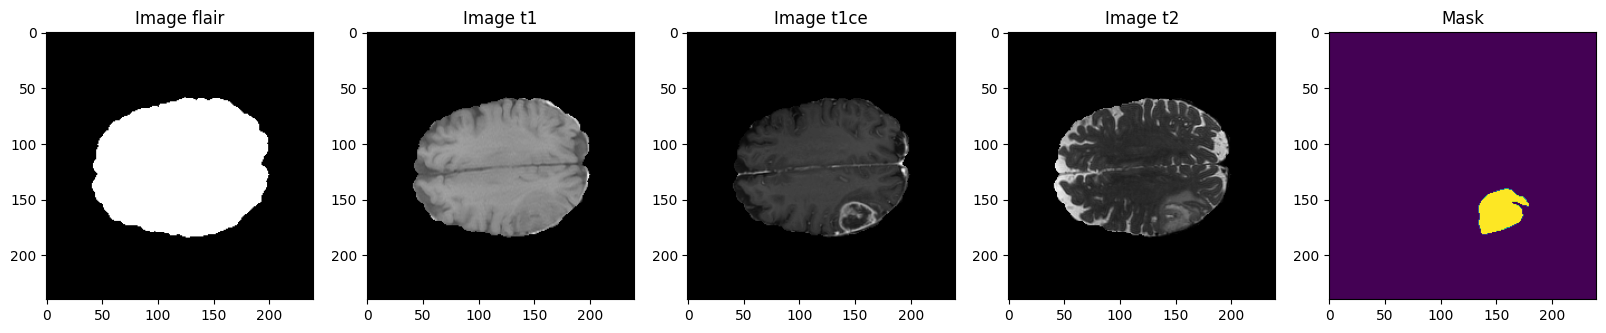

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 7
ax1.imshow(noramlized_image[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(noramlized_image1[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')

In [ ]:
test_image_flair.shape


(240, 240, 155)

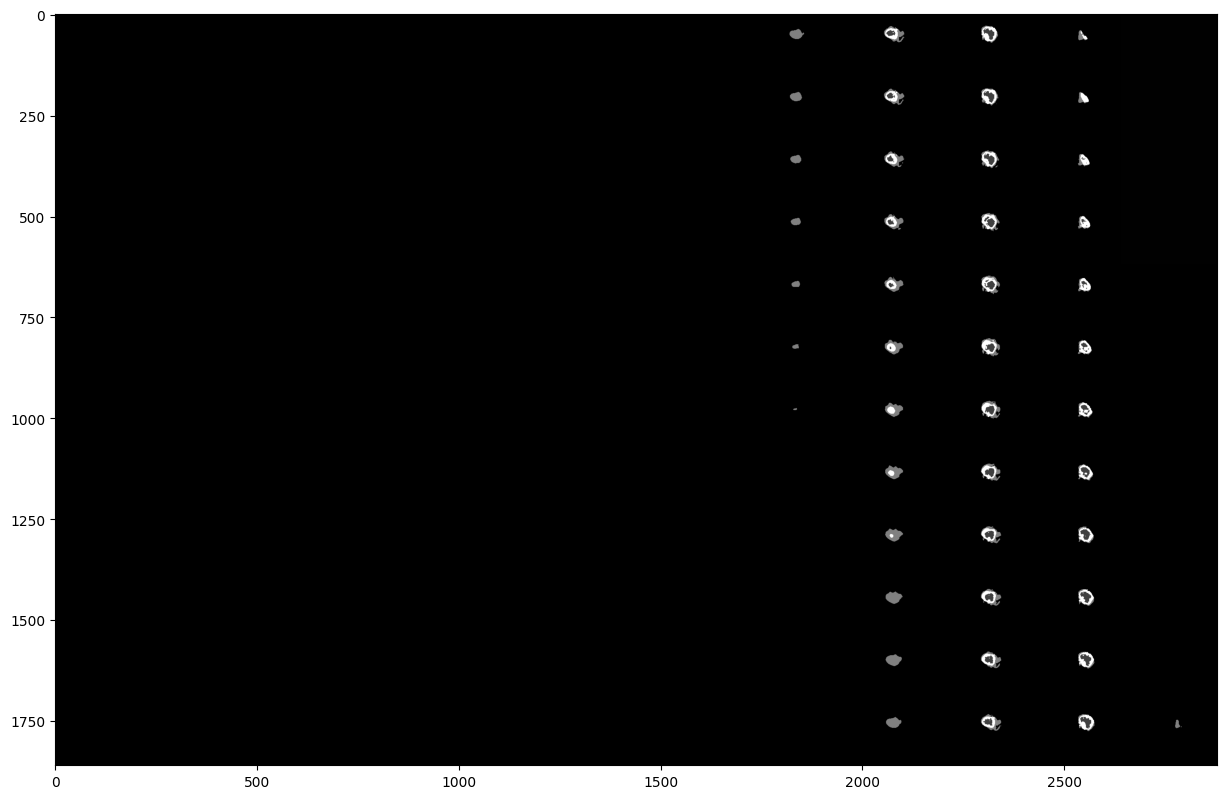

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_mask[50:-50,:,:]), 90, resize=True), cmap ='gray')

In [ ]:
np.min(test_image_flair), np.max(test_image_flair), test_image_flair.shape, type(test_image_flair)

(0.0, 3333.392006792128, (240, 240, 155), numpy.ndarray)

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_data_ids = [f.path for f in os.scandir(DATASET_PATH)]


In [ ]:
train_data_ids[0]

'/content/drive/MyDrive/PKG - UCSF-PDGM-v3/UCSF-PDGM-v3/UCSF-PDGM-0012_nifti'

In [ ]:
train_data_mask_ids = [f.path for f in os.scandir(MASK)]

In [ ]:
train_data_mask_ids.sort()

In [ ]:
mask_ids = []
for i in range(len(train_data_mask_ids)):
  test = train_data_mask_ids[i].split('_automated_approx_segm.nii')[0]
  test1 = test.split('/automated_segm/')[1]
  mask_ids.append(test1)



In [ ]:
train_ids = []
for i in range(len(train_data_ids)):
  x = train_data_ids[i].split("UCSF-PDGM-v3/UCSF-PDGM-v3/")[1]
  x = x.split('_nifti')[0]
  train_ids.append(x)


In [ ]:
train_ids[0]

'UCSF-PDGM-0012'

In [ ]:
train_ids.sort()
len(train_ids)

501

In [ ]:
train_ids[0]

'UCSF-PDGM-0004'

In [ ]:
mask_ids.sort()
len(mask_ids)

611

In [ ]:
def remove_unmatch_ids(dataset1,dataset2):
  for i in dataset1:
    if i not in dataset2:
      dataset1.remove(i)

In [ ]:
remove_unmatch_ids(train_ids,mask_ids)
remove_unmatch_ids(mask_ids,train_ids)

In [ ]:
result = []
for i in train_ids:
    if i not in mask_ids:
      result.append(i)

In [ ]:
result

['UPENN-GBM-00613_21',
 'UPENN-GBM-00615_21',
 'UPENN-GBM-00617_21',
 'UPENN-GBM-00619_21',
 'UPENN-GBM-00621_21',
 'UPENN-GBM-00623_21',
 'UPENN-GBM-00625_21',
 'UPENN-GBM-00627_21',
 'UPENN-GBM-00629_21']

In [ ]:
for i in result:
  train_ids.remove(i)



In [ ]:
len(train_ids)

611

In [ ]:
len(mask_ids)

611

In [ ]:
train_data_ids.sort()
train_ids.sort()

In [ ]:
volume = []
for i in range(len(train_ids)):
  case_path = os.path.join(DATASET_PATH, train_ids[i]+'_nifti' )
  data_path = os.path.join(case_path, f'{train_ids[i]}_FLAIR.nii')
  img = nib.load(data_path)
  flair = img.get_fdata()
  threshold_value = 0.0  # Adjust the threshold value as needed
  thresholded_data = np.where(flair > threshold_value, 1, 0)
# Calculate the voxel size (assuming isotropic voxel dimensions)
  voxel_size_mm = np.prod(img.header.get_zooms())
  voxel_size_cm = voxel_size_mm*0.1
# Calculate the volume in cubic millimeters
  volume_mm3 = np.sum(thresholded_data) * voxel_size_cm**3
  volume.append(volume_mm3)


In [ ]:
volume[0]

1432.0270000000003

In [ ]:
train_ids.remove('UCSF-PDGM-0541')

In [ ]:
volume_t = []
for i in range(len(train_ids)):
  case_path = os.path.join(DATASET_PATH, train_ids[i]+'_nifti')
  data_path = os.path.join(case_path, f'{train_ids[i]}_tumor_segmentation.nii')
  img = nib.load(data_path)
  flair = img.get_fdata()
  threshold_value = 0.0  # Adjust the threshold value as needed
  thresholded_data = np.where(flair > threshold_value, 1, 0)
# Calculate the voxel size (assuming isotropic voxel dimensions)
  voxel_size_mm = np.prod(img.header.get_zooms())
  voxel_size_cm = voxel_size_mm*0.1
# Calculate the volume in cubic millimeters
  volume_mm3 = np.sum(thresholded_data) * voxel_size_cm**3
  volume_t.append(volume_mm3)


In [ ]:
volume.remove(volume[500])

In [ ]:
len(volume)

500

In [ ]:
# List to store the calculated percentages
percentages = []

# Calculate percentages and append them to the 'percentages' list
for part, whole in zip(volume_t, volume):
    # Calculate the percentage
    percentage = (part / whole) * 100
    rounded_percentage = round(percentage, 2)
    # Append the result to the 'percentages' list
    percentages.append(rounded_percentage)

# Display the list of percentages
print("Percentages:", percentages)



Percentages: [2.93, 2.18, 13.14, 12.13, 8.57, 8.17, 9.06, 16.47, 7.34, 13.69, 6.15, 7.68, 6.14, 1.24, 3.63, 5.39, 4.76, 8.97, 2.92, 4.41, 9.69, 5.29, 5.34, 4.44, 4.67, 7.63, 5.45, 9.45, 9.2, 7.98, 1.88, 4.35, 14.23, 6.11, 6.99, 14.9, 1.16, 2.06, 8.37, 6.48, 7.11, 2.71, 4.09, 7.07, 4.92, 10.84, 4.91, 1.92, 3.88, 7.62, 8.67, 16.18, 14.02, 2.62, 14.04, 0.27, 10.1, 4.46, 3.29, 9.59, 6.23, 3.78, 8.15, 5.25, 1.18, 6.18, 11.78, 3.34, 6.04, 2.68, 8.1, 1.06, 2.0, 6.31, 2.6, 5.49, 1.29, 18.19, 13.19, 0.92, 1.94, 3.79, 13.41, 2.51, 7.47, 8.56, 1.53, 6.52, 0.84, 6.86, 6.56, 4.65, 2.71, 5.73, 10.88, 1.43, 8.85, 5.76, 6.49, 8.4, 3.71, 9.04, 6.26, 9.7, 2.56, 5.42, 13.54, 0.48, 8.29, 14.15, 5.33, 2.9, 3.43, 2.09, 5.85, 10.1, 5.93, 7.2, 12.25, 6.08, 8.92, 8.93, 9.81, 9.23, 8.98, 10.43, 8.8, 7.4, 11.07, 2.55, 0.74, 5.47, 11.84, 3.87, 5.71, 1.93, 7.24, 6.84, 5.97, 12.8, 10.53, 3.47, 9.65, 7.7, 5.51, 3.54, 1.94, 6.32, 6.59, 4.89, 7.15, 5.58, 11.69, 6.83, 11.78, 3.36, 11.72, 4.8, 5.03, 5.54, 5.81, 2.86, 8.

In [ ]:
df = pd.DataFrame(AREA,columns =['brain_AREAt_in_cm^3'])

df

,brain_volume_in_cm^3
0,1432.027
1,1302.093
2,1716.062
3,1390.174
4,1393.310
...,...
495,1560.843
496,1829.418
497,1347.270
498,1603.776


In [ ]:
df['brain_tumor_volume_in_cm^3'] = volume_t
df['brain_tumor_%'] = percentages

df

,brain_volume_in_cm^3,brain_tumor_volume_in_cm^3,brain_tumor_%
0,1432.027,41.919,2.93
1,1302.093,28.419,2.18
2,1716.062,225.535,13.14
3,1390.174,168.611,12.13
4,1393.310,119.424,8.57
...,...,...,...
495,1560.843,48.477,3.11
496,1829.418,15.585,0.85
497,1347.270,43.251,3.21
498,1603.776,11.785,0.73


In [ ]:
df.to_csv('UCSF-PDGM-v3_vol_of_brain_tumor.csv')